# Remote Pull from Soccer Players' Stats Database

By Michael Gonzalez

I was tasked to retrieve soccer players stats from a remote MySQL database for a local soccer Facebook group. Once I acquired the data, I will take a look at the overall structure and convert it to DataFrames. When the data is in a DataFrame, it will be easier to perform some exploratory data analysis. During the analysis, I will look at the database and look for insights. I will use MySQL functions, such as JOIN and GROUP BY. I will also create data visualizations of comparing the different player's stats.

In [9]:
# Importing the needed libraries

import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

I used the mysql connector library to connect to the remote MySQL database. I also used pandas to convert MySQL to a DataFrame and matplotlib.pyplot to create charts.

## Explortary Data Analysis

In [2]:
# Connecting to the remote MySQL database  
# and convert it to a DataFrame
# Getting a overview of the DataFrame

mydb = mysql.connector.connect(
    host = "*****",
    user = "*****",
    password = "*****",
    database = "*****"
)

mycursor = mydb.cursor()

sql = """
      SELECT 
         * 
      FROM 
         Player
      """


player_df = pd.read_sql(sql, con = mydb)
player_df.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [3]:
# Looking for players that are taller
# than, equal to 180 cm

mycursor = mydb.cursor()

sql = """
      SELECT 
        *
      FROM
        Player
      WHERE height >= 180
      
      """
playersheight_df = pd.read_sql(sql, con = mydb)

playersheight_df.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
2,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
3,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
4,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
5,11,23889,Aaron Mokoena,47189,1980-11-25 00:00:00,182.88,181
6,13,163222,Aaron Muirhead,213568,1990-08-30 00:00:00,187.96,168
7,17,161644,Aaron Taylor-Sinclair,213569,1991-04-08 00:00:00,182.88,176
8,18,23499,Aaron Wilbraham,2335,1979-10-21 00:00:00,190.50,159
9,20,46447,Abasse Ba,156626,1976-07-12 00:00:00,187.96,185


After performing a few primary exploratory data analyses. I want to dig a little deeper. I have noticed many players are taller than 180 cm (5 ft 10 inches). 

## Data Visualizations 

I will perform the join function to combine two databases into one. Now I want to start creating some data visualizations. I will create a data visualization from the query about the player's height.

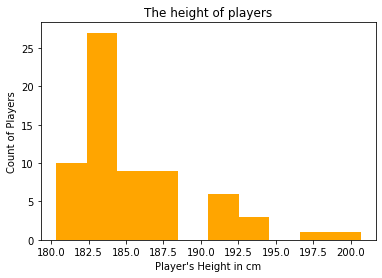

In [4]:
# Creating a histogram of players taller than and equal to 180 cenimeters

# data source
height = playersheight_df["height"]

# chart settings
plt.subplots(figsize = (6, 4))
plt.hist(height, color = "orange")
plt.ylabel("Count of Players")
plt.xlabel("Player's Height in cm")
plt.title("The height of players")

plt.show()

I will perform a inner join function to combine two tables into one. I will look at comparing the player's cumulative weight and height in an area chart. 

In [5]:
mycursor = mydb.cursor()

sql = """
      SELECT 
        *
      FROM
        Player ply
      INNER JOIN Team t ON ply.id = t.id
      WHERE weight between 150 and 190
      
      """
playerweight_df = pd.read_sql(sql, con = mydb)

playerweight_df.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,9987,673,KRC Genk,GEN
1,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,3,10000,15005,SV Zulte-Waregem,ZUL
2,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,5,9984,1750,KSV Cercle Brugge,CEB
3,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161,6,8635,229,RSC Anderlecht,AND
4,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181,9,7947,,FCV Dender EH,DEN
5,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170,10,9985,232,Standard de Liège,STL
6,11,23889,Aaron Mokoena,47189,1980-11-25 00:00:00,182.88,181,11,8203,110724,KV Mechelen,MEC
7,12,231592,Aaron Mooy,194958,1990-09-15 00:00:00,175.26,150,12,8342,231,Club Brugge KV,CLB
8,13,163222,Aaron Muirhead,213568,1990-08-30 00:00:00,187.96,168,13,9999,546,KSV Roeselare,ROS
9,15,75489,Aaron Ramsey,186561,1990-12-26 00:00:00,177.80,154,15,4049,,Tubize,TUB


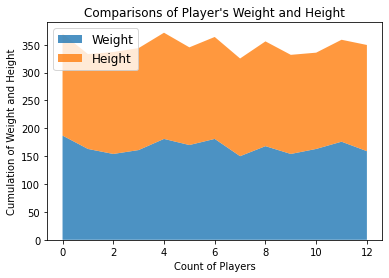

In [6]:
# Creating area chart of comparing player's weight & height

plt.stackplot(playerweight_df.index, playerweight_df["weight"],
              playerweight_df["height"], labels = ["Weight", "Height"],
              alpha = 0.8)
plt.legend(loc = 2, fontsize = "large")
plt.ylabel("Cumulation of Weight and Height")
plt.xlabel("Count of Players")
plt.title("Comparisons of Player's Weight and Height")

plt.show()

This area chart is interesting but, it is looking at the cumulative amount of the player's weight and height. I want to create a new table that has players with higher average ratings. 

In [7]:
# Joining two tables into one of players name, overall rating and api ids
# Using aliases and group by 

mycursor = mydb.cursor()

sql = """
      SELECT
        patt.player_api_id,
        ply.player_name,
      AVG(patt.overall_rating) as rating
      FROM
        Player_Attributes patt
      INNER JOIN Player ply ON patt.player_api_id = ply.player_api_id
      GROUP BY patt.player_api_id,
        ply.player_name
      ORDER BY rating DESC
      """

newplayerlist_df = pd.read_sql(sql, con = mydb)

newplayerlist_df

,player_api_id,player_name,rating
0,23780,Aaron Hughes,71.692308
1,30572,Aaron Galindo,69.086957
2,162549,Aaron Doran,67.000000
3,155782,Aaron Cresswell,66.969697
4,505942,Aaron Appindangoye,63.600000


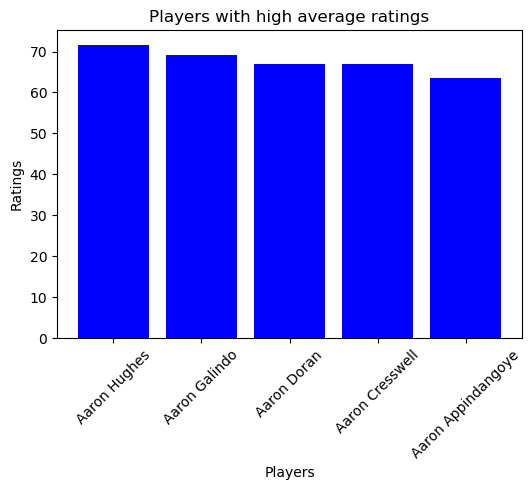

In [8]:
# Creating a simple bar chart of players 
# with high average ratings

plt.rcdefaults()
fig, ax = plt.subplots(figsize = (6, 4))

# data sources
players = newplayerlist_df["player_name"]
rates = newplayerlist_df["rating"]

# Chart settings
ax.bar(players, rates, color = "blue")
plt.xticks(rotation = 45)
ax.set_ylabel("Ratings")
ax.set_xlabel("Players")
ax.set_title("Players with high average ratings")

plt.show()